# data Wrangling

Data wrangling, also known as data munging or data cleaning, is the process of transforming and mapping data from one format or structure into another in order to make it more useful and appropriate for analysis. This may include tasks such as removing or replacing missing values, handling outliers, merging data sets, and converting data types. Data wrangling is a crucial step in the data science process and is often the most time-consuming and labor-intensive task.
- data wranglin helps to make the data more consistant,accurate and useful for analysis and decision making.

# The steps for data wrangling
1. gathering data(kia)
2. tools to clean data(kis se clean) Libraries
3. how to do,(steps)

In [272]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [273]:
df = sns.load_dataset('titanic')

In [274]:
# 2. Access the data
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [275]:
df.drop(columns = "deck", inplace=True)

In [276]:
df.shape

(891, 14)

In [277]:
df["age"] = df.age.fillna(value = df["age"].mean())

In [278]:
df.isnull().sum()/len(df)*100


survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [279]:
df["embarked"] = df.embarked.fillna(value = df["embarked"].mode()[0])

In [280]:
df.isnull().sum()/len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [281]:
df["embark_town"]=df.embark_town.fillna(value=df["embark_town"].mode()[0])

In [282]:
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers removals
##  With Visualization

<AxesSubplot: xlabel='sex', ylabel='age'>

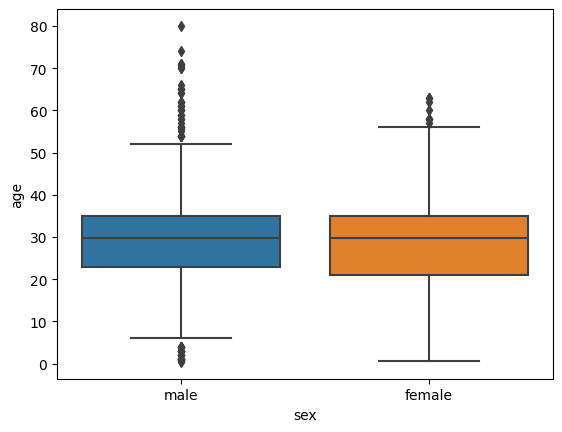

In [283]:
import seaborn as sns
sns.boxplot(data=df,x ="sex",y = "age")

In [284]:
# Q1 = df["age"].quantile(0.25)
# Q3 = df["age"].quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [285]:
# Q1 = df["age"].quantile(0.25)
# Q3 = df["age"].quantile(0.75)
# IQR = Q3 - Q1
# IQR
# lower_bound = Q1-1.5*IQR
# upper_bound = Q3+1.5*IQR
# df = df[(df["age"] > lower_bound) & (df["age"] < upper_bound)]

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [287]:
# Q1 = df["fare"].quantile(0.25)
# Q3 = df["fare"].quantile(0.75)
# IQR = Q3 - Q1
# IQR
# lower_bound = Q1-1.5*IQR
# upper_bound = Q3+1.5*IQR
# df = df[(df["fare"] > lower_bound) & (df["fare"] < upper_bound)]

In [288]:
df.shape

(891, 14)

In [289]:
# Zscore method
#pip install scipy
from scipy import stats
import numpy as np

zscore = np.abs(stats.zscore(df["age"]))
threshold=2
df=df[zscore<threshold]
#df=df[zscore<threshold.all()]

In [290]:
zscore = np.abs(stats.zscore(df["fare"]))
threshold=2
# df=df[zscore<threshold.all(axis=1)]
df=df[zscore<threshold]

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 789 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     789 non-null    int64   
 1   pclass       789 non-null    int64   
 2   sex          789 non-null    object  
 3   age          789 non-null    float64 
 4   sibsp        789 non-null    int64   
 5   parch        789 non-null    int64   
 6   fare         789 non-null    float64 
 7   embarked     789 non-null    object  
 8   class        789 non-null    category
 9   who          789 non-null    object  
 10  adult_male   789 non-null    bool    
 11  embark_town  789 non-null    object  
 12  alive        789 non-null    object  
 13  alone        789 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 76.4+ KB


# 4. finding and dropping duplicates

In [292]:
# finding duplicates
df.duplicated().sum()

109

In [293]:
df.drop_duplicates(inplace=True)

In [294]:
df.duplicated().sum()

0

In [295]:
df.shape

(680, 14)

In [296]:
df.duplicated().sum()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# 5 Data normalization
To bring data to one scale

In [297]:
#1. import libraries
#pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#2. data
df

#3. select columns to normalize
cols_to_normalize = ['age', 'fare']

#4. create the scaler function/tool
scaler = MinMaxScaler()

#5 fit and transform the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

#6 check the data
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.349515,1,0,0.060417,S,Third,man,True,Southampton,no,False
1,1,1,female,0.660194,1,0,0.594027,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0.427184,0,0,0.066042,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.601942,1,0,0.442500,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.601942,0,0,0.067083,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.679612,0,5,0.242708,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.291262,0,0,0.250000,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.499012,1,2,0.195417,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.427184,0,0,0.250000,C,First,man,True,Cherbourg,yes,True


In [298]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,0.391176,2.336765,0.487019,0.489706,0.367647,0.208821
std,0.488373,0.819390,0.208471,0.947773,0.826733,0.205049
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.349515,0.000000,0.000000,0.066042
50%,0.000000,3.000000,0.499012,0.000000,0.000000,0.120452
75%,1.000000,3.000000,0.601942,1.000000,0.000000,0.248125
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


In [299]:
#1. import libraries
#pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler
#2. data
df

#3. select columns to normalize
cols_to_normalize = ['age', 'fare']

#4. create the scaler function/tool
scaler = StandardScaler()

#5 fit and transform the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

#6 check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.660071,1,0,-0.724282,S,Third,man,True,Southampton,no,False
1,1,1,female,0.831302,1,0,1.879994,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.287228,0,0,-0.696829,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.551669,1,0,1.140467,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.551669,0,0,-0.691745,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.924512,0,5,0.165389,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.939703,0,0,0.200976,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.057570,1,2,-0.065417,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.287228,0,0,0.200976,C,First,man,True,Cherbourg,yes,True


In [300]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,680.000000,680.000000,6.800000e+02,680.000000,680.000000,680.000000
mean,0.391176,2.336765,5.224579e-17,0.489706,0.367647,0.000000
std,0.488373,0.819390,1.000736e+00,0.947773,0.826733,1.000736
min,0.000000,1.000000,-2.337865e+00,0.000000,0.000000,-1.019144
25%,0.000000,2.000000,-6.600711e-01,0.000000,0.000000,-0.696829
50%,0.000000,3.000000,5.756976e-02,0.000000,0.000000,-0.431282
75%,1.000000,3.000000,5.516692e-01,1.000000,0.000000,0.191825
max,1.000000,3.000000,2.462490e+00,8.000000,6.000000,3.861334


x_stand = (x - mean(x))/std(x)
where x_stand is standarized variable, x is the original variable mean(x) is the mean of variable x std(x) is the standard deviation of variable x 

# 6. Log Transformation 

In [301]:
kashti = sns.load_dataset("titanic")
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [302]:
import numpy as np
kashti["age"] = kashti["age"].fillna(kashti["age"].median( ))
kashti["fare"] = kashti["fare"].fillna(kashti["fare"].median( ))
# log transform
kashti["age"] = np.log(kashti["age"])
kashti["fare"] = np.log(kashti["fare"])
kashti.head()





c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot: xlabel='sex', ylabel='fare'>

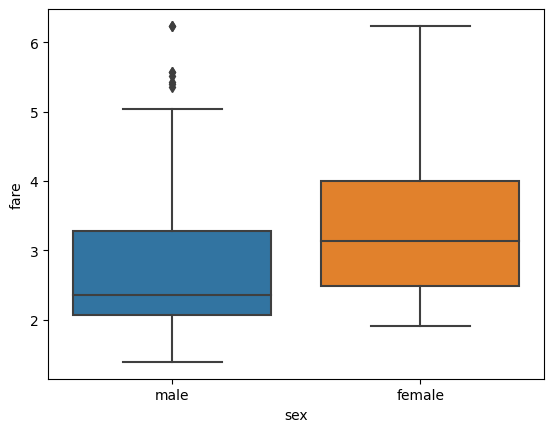

In [303]:
sns.boxplot(data=kashti,x = "sex", y="fare" )

In [304]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [305]:
df["family_size"] = df["sibsp"] +  df["parch"]

c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='sex', ylabel='age'>

c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg,

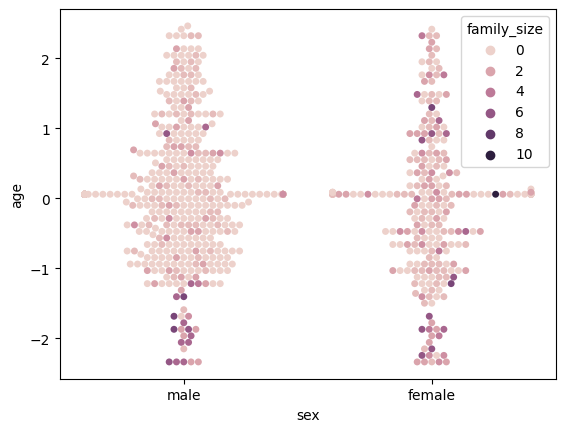

In [306]:
sns.swarmplot(data=df, x="sex",y = "age", hue = "family_size")

In [307]:
df = df.rename(columns={"survived":"survival"})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survival     680 non-null    int64   
 1   pclass       680 non-null    int64   
 2   sex          680 non-null    object  
 3   age          680 non-null    float64 
 4   sibsp        680 non-null    int64   
 5   parch        680 non-null    int64   
 6   fare         680 non-null    float64 
 7   embarked     680 non-null    object  
 8   class        680 non-null    category
 9   who          680 non-null    object  
 10  adult_male   680 non-null    bool    
 11  embark_town  680 non-null    object  
 12  alive        680 non-null    object  
 13  alone        680 non-null    bool    
 14  family_size  680 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(5), object(5)
memory usage: 71.2+ KB


In [314]:
table = pd.pivot_table(df,values="age",index="pclass",
            columns = "survival", aggfunc=np.sum)
table

survival,0,1
pclass,,
1,41.998038,36.289022
2,20.533092,-4.434099
3,-48.520763,-45.865290


<AxesSubplot: xlabel='age', ylabel='fare'>

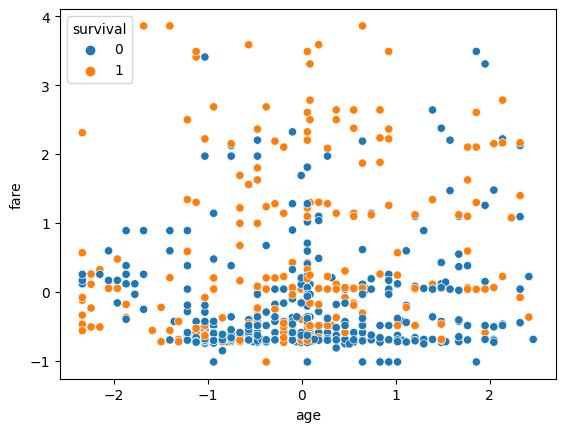

In [315]:
sns.scatterplot(data=df, x="age", y="fare", hue="survival")

In [316]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.660071,1,0,-0.724282,S,Third,man,True,Southampton,no,False,1
1,1,1,female,0.831302,1,0,1.879994,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,-0.287228,0,0,-0.696829,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.551669,1,0,1.140467,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.551669,0,0,-0.691745,S,Third,man,True,Southampton,no,True,0


# 6. saving the data

In [317]:
df.to_csv("preprocised_data.csv")